<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Segmentation_Rorschach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segmentation program is based on the fastai tutorial example: https://docs.fast.ai/tutorial.vision.html#Segmentation

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastai.vision.all import *
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images'),Path('/root/.fastai/data/camvid_tiny/codes.txt')]

In [ ]:
codes = np.loadtxt(path/'codes.txt',dtype=str)
codes


array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter',
       'OtherMoving', 'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone', 'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [ ]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0016E5_06810.png')

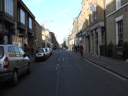

In [ ]:
img = Image.open(fnames[0])
img

In [ ]:
(path/'labels').ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0006R0_f02910_P.png')

In [ ]:
img_P = Image.open((path/'labels').ls()[0])
img_Pt = image2tensor(img_P)
img_Pt.max()

tensor(30, dtype=torch.uint8)

In [ ]:
#open_mask((path/'labels').ls()[0])

NameError: ignored

In [ ]:
def label_func(fn): return path/'labels'/f'{fn.stem}_P{fn.suffix}'

In [ ]:
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames=fnames, label_func=label_func, codes=codes)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


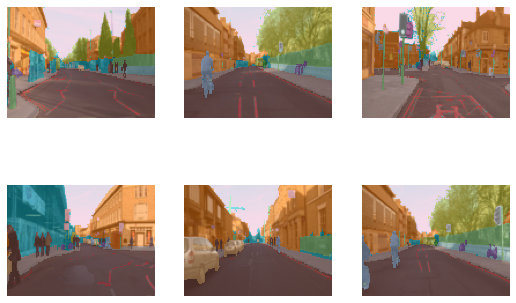

In [ ]:
dls.show_batch(max_n=6)

In [ ]:
learn = unet_learner(dls,resnet34)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,time
0,3.213437,2.557799,01:10


epoch,train_loss,valid_loss,time
0,1.859820,1.725388,01:16
1,1.603323,1.187373,01:16
2,1.431592,1.189916,01:16


epoch,train_loss,valid_loss,time
0,1.859820,1.725388,01:16
1,1.603323,1.187373,01:16
2,1.431592,1.189916,01:16
3,1.289667,0.915120,01:15
4,1.165401,0.818383,01:15
5,1.065032,0.781980,01:15
